# 1. 数据预处理/划分数据集

In [1]:
import pandas as pd 
import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 从excel导入待训练的数据
VIS0_df = pd.read_excel("V0.xlsx", header=None) #无输入时的荧光信号上升
VIS1_df = pd.read_excel("V1.xlsx", header=None) #输入1(HIV)
VIS2_df = pd.read_excel("V2.xlsx", header=None) #输入2(HPV)
VIS3_df = pd.read_excel("V3.xlsx", header=None) #输入1(HIV)+2(HPV)
VIS4_df = pd.read_excel("V4.xlsx", header=None) #输入4(HHV)
VIS5_df = pd.read_excel("V5.xlsx", header=None) #输入1(HIV)+4(HHV)
VIS6_df = pd.read_excel("V6.xlsx", header=None) #输入2(HPV)+4(HHV)
VIS7_df = pd.read_excel("V7.xlsx", header=None) #输入1(HIV)+2(HPV)+4(HHV)

VIS0_data, VIS1_data, VIS2_data, VIS3_data, VIS4_data, VIS5_data, VIS6_data, VIS7_data = [], [], [], [], [], [], [], []

# 用于训练的数据个数
train_n = 300

for i in range(train_n):
    VIS0_data.append(VIS0_df.iloc[:, i])

for i in range(train_n):
    VIS1_data.append(VIS1_df.iloc[:, i])

for i in range(train_n):
    VIS2_data.append(VIS2_df.iloc[:, i])

for i in range(train_n):
    VIS3_data.append(VIS3_df.iloc[:, i])

for i in range(train_n):
    VIS4_data.append(VIS4_df.iloc[:, i])

for i in range(train_n):
    VIS5_data.append(VIS5_df.iloc[:, i])

for i in range(train_n):
    VIS6_data.append(VIS6_df.iloc[:, i])

for i in range(train_n):
    VIS7_data.append(VIS7_df.iloc[:, i])

print("VIS0数据：",len(VIS0_data))
print("VIS1数据：",len(VIS1_data))
print("VIS2数据：",len(VIS2_data))
print("VIS3数据：",len(VIS3_data))
print("VIS4数据：",len(VIS4_data))
print("VIS5数据：",len(VIS5_data))
print("VIS6数据：",len(VIS6_data))
print("VIS7数据：",len(VIS7_data))
print("数据维度：",len(list(VIS0_data[0])), len(list(VIS1_data[0])), len(list(VIS2_data[0])), len(list(VIS3_data[0])), len(list(VIS4_data[0])), len(list(VIS5_data[0])), len(list(VIS6_data[0])), len(list(VIS7_data[0])))

train_data = []
train_label = []
test_data = []
test_label = []

for i in range(0,len(VIS0_data)):
    train_data.append(list(VIS0_data[i]))
    train_label.append(0)

for i in range(0,len(VIS1_data)):
    train_data.append(list(VIS1_data[i]))
    train_label.append(1)

for i in range(0,len(VIS2_data)):
    train_data.append(list(VIS2_data[i]))
    train_label.append(2)

for i in range(0,len(VIS3_data)):
    train_data.append(list(VIS3_data[i]))
    train_label.append(3)

for i in range(0,len(VIS4_data)):
    train_data.append(list(VIS4_data[i]))
    train_label.append(4)

for i in range(0,len(VIS5_data)):
    train_data.append(list(VIS5_data[i]))
    train_label.append(5)

for i in range(0,len(VIS6_data)):
    train_data.append(list(VIS6_data[i]))
    train_label.append(6)

for i in range(0,len(VIS7_data)):
    train_data.append(list(VIS7_data[i]))
    train_label.append(7)

print("训练数据:",len(train_data),train_data)
print("测试数据:",len(test_data),test_data)


VIS0数据： 300
VIS1数据： 300
VIS2数据： 300
VIS3数据： 300
VIS4数据： 300
VIS5数据： 300
VIS6数据： 300
VIS7数据： 300
数据维度： 1 1 1 1 1 1 1 1
训练数据: 2400 [[0.2271614999999998], [0.19616049999999996], [0.21255550000000012], [0.18896900000000016], [0.22398950000000006], [0.24196149999999994], [0.21062250000000016], [0.2169485], [0.22178500000000012], [0.19719850000000028], [0.21624549999999987], [0.19351200000000013], [0.2185785], [0.18448850000000006], [0.22470500000000015], [0.2058470000000001], [0.1966420000000002], [0.2007874999999999], [0.210588], [0.21622399999999997], [0.23319899999999993], [0.23798450000000004], [0.20215899999999998], [0.19097450000000027], [0.2229395000000003], [0.2064585000000001], [0.19080850000000016], [0.2139190000000002], [0.22219200000000017], [0.19413650000000016], [0.24216399999999982], [0.22468349999999981], [0.19971000000000005], [0.21728250000000005], [0.20747650000000029], [0.18971850000000012], [0.22630299999999992], [0.22489100000000017], [0.19018100000000016], [0.23398849

# 2. 数据集拆/RF模型训练/网格搜索最优参数/cv=5

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 将数据分割为训练集和测试集
train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, test_size=0.3, random_state=19)

# 检查训练数据的第一个数据样本的特征数量
feature_count_train = len(train_data[0])

# 检查测试数据的第一个数据样本的特征数量
feature_count_test = len(test_data[0])

print("训练数据的特征数量:", feature_count_train)
print("测试数据的特征数量:", feature_count_test)

print("训练数据:",len(train_data),train_data)
print("测试数据:",len(test_data),test_data)


训练数据的特征数量: 1
测试数据的特征数量: 1
训练数据: 1680 [[3.2523739999999997], [0.20026050000000017], [9.332741], [9.051281], [51.231184999999996], [9.852974999999999], [33.828131], [15.156507999999999], [15.364545], [16.174957], [24.386254675200004], [40.97786669399999], [9.713184], [51.973504999999996], [0.19741500000000012], [0.19220100000000007], [15.268508], [39.159783], [24.549101999999998], [3.3325769999999997], [32.929682], [15.573145], [9.287561], [3.2625259999999994], [16.338277], [0.199554], [33.476831], [23.155067427840002], [9.438564000000001], [23.16229785504], [0.18091750000000006], [52.00866499999999], [32.898461999999995], [24.520221763200002], [16.018757], [47.416903], [52.405865], [33.690922], [0.18454650000000017], [29.6630931465], [33.408192], [24.5626584192], [29.967783961500004], [0.19743100000000013], [48.437073], [3.366187], [24.442642], [3.2336359999999997], [15.380535000000002], [38.576583], [3.837079], [9.582784], [41.73540223247999], [15.592198], [9.677514], [33.445822], [3.2

# 3. 创建RF分类模型

In [3]:

from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf = RandomForestClassifier(random_state=19)

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],                #决策树的数量
    'max_depth': [None],                       #最大树深度
    'min_samples_split': [2, 5, 10],           #节点分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],             #叶子节点所需的最小样本数
    'max_features': ['sqrt'],                  #每个节点分裂时考虑的最大特征数
    'bootstrap': [True],                       #是否使用自助采样
    'criterion': ['gini', 'entropy'],          #分裂标准
    'class_weight': [None],                    #类别权重
    'random_state': [19]                       #随机种子
}

# 创建网格搜索对象，使用5折交叉验证评估每个参数组合的性能
grid_search = GridSearchCV(rf, param_grid, cv=5)

# 在整个训练集上进行网格搜索和交叉验证
grid_search.fit(train_data, train_label)

# 输出最佳参数组合
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数进行训练
best_rf = grid_search.best_estimator_

# 在测试集上进行预测
test_score = best_rf.predict_proba(test_data)

# 在训练集上进行预测
train_predictions = best_rf.predict(train_data)

# 在训练集上进行交叉验证
cv_scores = cross_val_score(rf, train_data, train_label, cv=5)

# 打印交叉验证的准确率
print("Cross-Validation Accuracy:", cv_scores.mean())
print("Cross-Validation Accuracy:", cv_scores)


Best Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 19}
Cross-Validation Accuracy: 1.0
Cross-Validation Accuracy: [1. 1. 1. 1. 1.]


# 4. 打印每一个样本的张量、真实标签和预测标签

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印每一个样本的张量、真实标签和预测标签
for i in range(len(test_data)):
    test_predictions = best_rf.predict(test_data)
    sample_tensor = test_data[i]
    true_label = test_label[i]
    predicted_label = test_predictions[i]
    print("Sample Tensor:", sample_tensor)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)


Sample Tensor: [9.140171]
True Label: 2
Predicted Label: 2
Sample Tensor: [23.029601581439998]
True Label: 4
Predicted Label: 4
Sample Tensor: [16.149087]
True Label: 3
Predicted Label: 3
Sample Tensor: [41.607366113999994]
True Label: 6
Predicted Label: 6
Sample Tensor: [0.21863349999999993]
True Label: 0
Predicted Label: 0
Sample Tensor: [29.95846410150001]
True Label: 5
Predicted Label: 5
Sample Tensor: [39.310053]
True Label: 6
Predicted Label: 6
Sample Tensor: [0.21771800000000008]
True Label: 0
Predicted Label: 0
Sample Tensor: [24.496651999999997]
True Label: 4
Predicted Label: 4
Sample Tensor: [24.193377043199998]
True Label: 4
Predicted Label: 4
Sample Tensor: [0.23114400000000002]
True Label: 0
Predicted Label: 0
Sample Tensor: [47.897413]
True Label: 7
Predicted Label: 7
Sample Tensor: [9.124131]
True Label: 2
Predicted Label: 2
Sample Tensor: [41.529952253999994]
True Label: 6
Predicted Label: 6
Sample Tensor: [51.183324999999996]
True Label: 7
Predicted Label: 7
Sample Ten

# 5. 打印报告/绘制数据图

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       214
           3       1.00      1.00      1.00       211
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       218
           6       1.00      1.00      1.00       203
           7       1.00      1.00      1.00       213

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

训练集混淆矩阵:
[[200   0   0   0   0   0   0   0]
 [  0 223   0   0   0   0   0   0]
 [  0   0 214   0   0   0   0   0]
 [  0   0   0 211   0   0   0   0]
 [  0   0   0   0 198   0   0   0]
 [  0   0   0   0   0 218   0   0]
 [  0   0   0   0   0   0 203   0]
 [  0   0   0   0   0   0   0 213]]


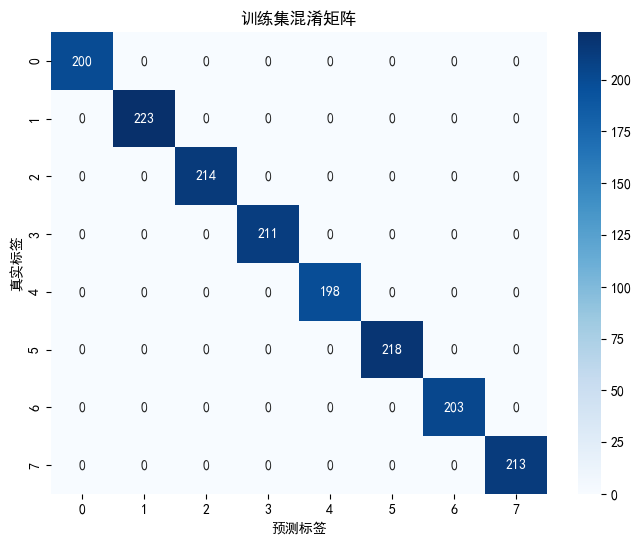

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00       102
           5       1.00      1.00      1.00        82
           6       1.00      1.00      1.00        97
           7       1.00      1.00      1.00        87

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

测试集准确率: 1.0
测试集精确率: 1.0
测试集召回率: 1.0
测试集F1值: 1.0
测试集混淆矩阵:
[[100   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0]
 [  0   0   0  89   0   0   0   0]
 [  0   0   0   0 102   0   0   0]
 [  0   0   0   0   0  82   0   0]
 [  0   0   0   0   0   0  97   0]
 [  0   0   0   0  

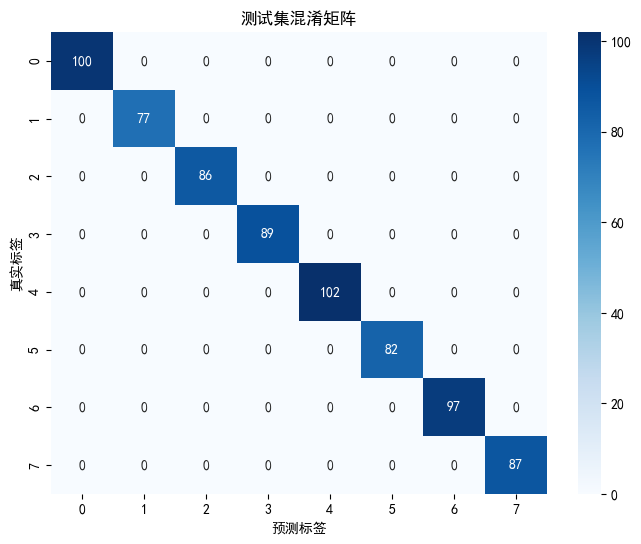

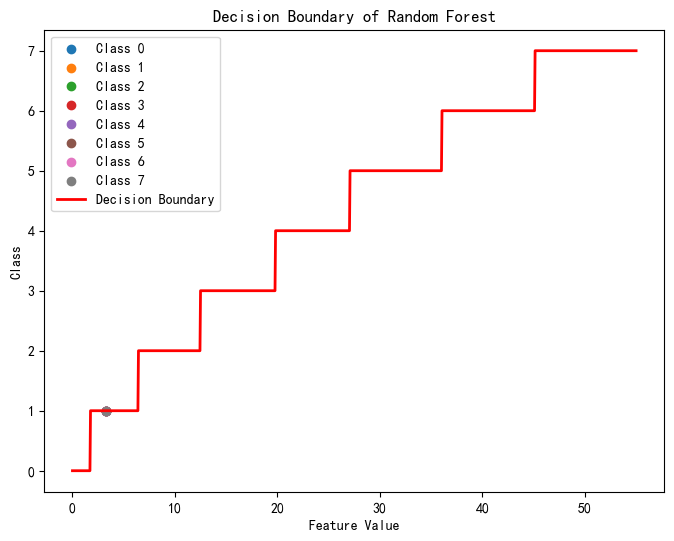

每个类别的决策数量： [32, 85, 110, 133, 132, 163, 165, 180]


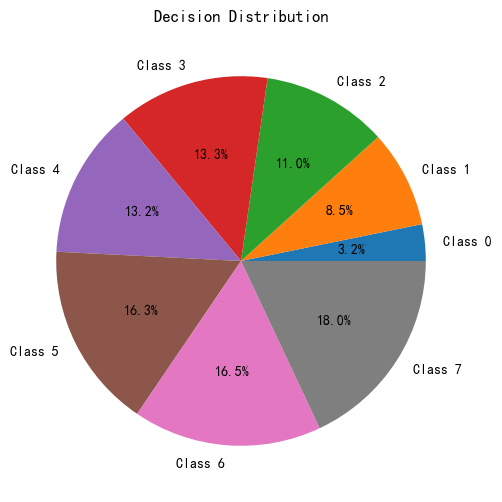

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印训练集的分类报告
train_report = classification_report(train_label, train_predictions)
print("Train Classification Report:")
print(train_report)

# 计算混淆矩阵
train_confu_mat = confusion_matrix(train_label, train_predictions)
print("训练集混淆矩阵:")
print(train_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(train_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("训练集混淆矩阵")
plt.show()



##############################################################

# 对测试集上进行分类预测
test_predictions = best_rf.predict(test_data)

# 打印测试集的分类报告
test_report = classification_report(test_label, test_predictions)
print("Test Classification Report:")
print(test_report)

# 计算准确率
accuracy = accuracy_score(test_label, test_predictions)
print("测试集准确率:", accuracy)

# 计算精确率
precision = precision_score(test_label, test_predictions, average='macro')
print("测试集精确率:", precision)

# 计算召回率
recall = recall_score(test_label, test_predictions, average='macro')
print("测试集召回率:", recall)

# 计算F1值
f1 = f1_score(test_label, test_predictions, average='macro')
print("测试集F1值:", f1)

# 计算混淆矩阵
test_confu_mat = confusion_matrix(test_label, test_predictions)
print("测试集混淆矩阵:")
print(test_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(test_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("测试集混淆矩阵")
plt.show()

####################################################################

# 绘制训练集决策边界图
X = train_data   # 特征数据
y = train_label  # 标签数据

# 指定保存路径和文件名
export_file = 'D:/Zz/Machine Learning/Multi-classification/viral identification/decision_boundary_data.csv'

# 定义绘制决策边界的函数
def plot_decision_boundary(X, y, best_rf, ax, export_file=None):
    xx = np.linspace(0, 55, 1000)
    yy = best_rf.predict(xx.reshape(-1, 1))
    for i in range(8):
        ax.scatter(X[y == i], y[y == i], label=f'Class {i}')

    # 保存决策边界数据到文件
    if export_file:
        decision_boundary_data = np.column_stack((xx, yy))
        np.savetxt(export_file, decision_boundary_data, delimiter=',', header='Feature,Class', comments='')
    
    ax.plot(xx, yy, color='r', lw=2, label='Decision Boundary')
    ax.legend()

# 绘制决策边界图
plt.figure(figsize=(8, 6))
plot_decision_boundary(X, y, best_rf, plt, export_file)
plt.title("Decision Boundary of Random Forest")
plt.xlabel("Feature Value")
plt.ylabel("Class")
plt.show()

# 定义绘制决策内容饼状图的函数
def plot_decision_pie(X, y, model):
    xx = np.linspace(0, 55, 1000)
    yy = model.predict(xx.reshape(-1, 1))
    
    # 统计每个类别的决策数量
    decision_counts = [np.sum(yy == i) for i in range(8)]
    print('每个类别的决策数量：', decision_counts)
    # 类别标签
    class_labels = [f'Class {i}' for i in range(8)]
    
    # 绘制饼状图
    plt.figure(figsize=(8, 6))
    plt.pie(decision_counts, labels=class_labels, autopct='%1.1f%%')
    plt.title("Decision Distribution")
    plt.show()

# 绘制决策内容饼状图
plot_decision_pie(X, y, best_rf)


# 6. 真实样本预处理

In [6]:
import pandas as pd

# 读取 Excel 文件
sample_df = pd.read_excel('Viral Samples.xlsx', header=None)

# 获取第2行和第361行数据
initial_value = sample_df.iloc[1]  # 第2行，第1行是样本名称
final_value = sample_df.iloc[360]  # 第361行(30 min)

# 进行数据处理，第361行的数据减去第2行的数据
deltaF = final_value - initial_value

# 输入样本数量
sample_n = 25

sample_data = []
sample_label = []

# 添加样本真实标签（与样本数量一致）
labels = [1, 1, 2, 2, 0, 0, 5, 5, 1, 5, 1, 3, 4, 7, 3, 5, 3, 6, 4, 5, 0, 0, 0, 1, 1]

for i in range(sample_n):
    sample_data.append(deltaF.iloc[i])
    sample_label.append(labels[i])

print(sample_data)


[4.914402, 4.431711, 7.939089000000001, 8.951363, 0.4654659999999997, 0.5764130000000001, 29.858507, 30.084099, 2.9898699999999994, 30.101979, 5.042525666666666, 12.933683999999998, 24.469567, 53.430148, 12.541374666666668, 33.151768999999994, 18.343263666666665, 40.354254999999995, 19.827642, 27.917583000000004, 0.6716639999999998, 0.6050019999999998, 0.5735410000000001, 3.5733099999999998, 3.526319]


# 8. 使用训练好的RF模型对真实样本数据进行分类

Sample Tensor: [4.914402]
True Label: 1
Predicted Label: 1
Sample Tensor: [4.431711]
True Label: 1
Predicted Label: 1
Sample Tensor: [7.939089]
True Label: 2
Predicted Label: 2
Sample Tensor: [8.951363]
True Label: 2
Predicted Label: 2
Sample Tensor: [0.465466]
True Label: 0
Predicted Label: 0
Sample Tensor: [0.576413]
True Label: 0
Predicted Label: 0
Sample Tensor: [29.858507]
True Label: 5
Predicted Label: 5
Sample Tensor: [30.084099]
True Label: 5
Predicted Label: 5
Sample Tensor: [2.98987]
True Label: 1
Predicted Label: 1
Sample Tensor: [30.101979]
True Label: 5
Predicted Label: 5
Sample Tensor: [5.04252567]
True Label: 1
Predicted Label: 1
Sample Tensor: [12.933684]
True Label: 3
Predicted Label: 3
Sample Tensor: [24.469567]
True Label: 4
Predicted Label: 4
Sample Tensor: [53.430148]
True Label: 7
Predicted Label: 7
Sample Tensor: [12.54137467]
True Label: 3
Predicted Label: 3
Sample Tensor: [33.151769]
True Label: 5
Predicted Label: 5
Sample Tensor: [18.34326367]
True Label: 3
Pr

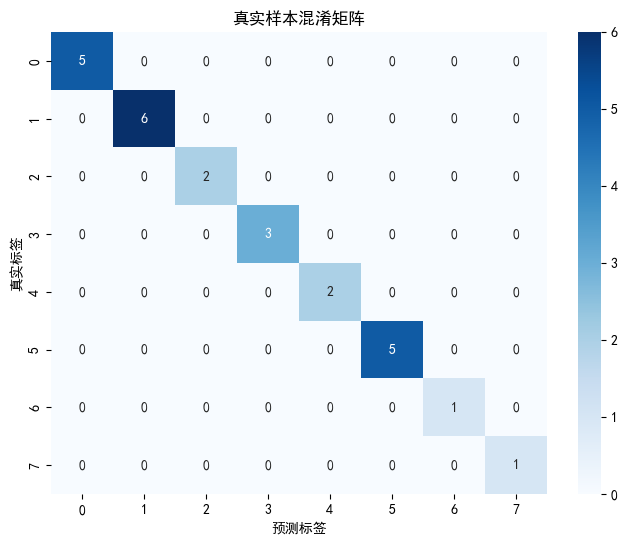

In [7]:
import numpy as np
sample_data_array = np.array(sample_data)
reshaped_data = sample_data_array.reshape(sample_n,1)
#print(reshaped_data)

sample_predictions = best_rf.predict(reshaped_data)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印每一个样本的张量、真实标签和预测标签
for i in range(len(reshaped_data)):
    sample_predictions = best_rf.predict(reshaped_data)
    sample_tensor = reshaped_data[i]
    true_label = sample_label[i]
    predicted_label = sample_predictions[i]
    print("Sample Tensor:", sample_tensor)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)

# 打印真实样本的分类报告
sample_report = classification_report(sample_label, sample_predictions)
print("Samples Classification Report:")
print(sample_report)

# 计算准确率
accuracy = accuracy_score(sample_label, sample_predictions)
print("真实样本准确率:", accuracy)

# 计算精确率
precision = precision_score(sample_label, sample_predictions, average='macro')
print("真实样本精确率:", precision)

# 计算召回率
recall = recall_score(sample_label, sample_predictions, average='macro')
print("真实样本召回率:", recall)

# 计算F1值
f1 = f1_score(sample_label, sample_predictions, average='macro')
print("真实样本F1值:", f1)

# 计算混淆矩阵
sample_confu_mat = confusion_matrix(sample_label, sample_predictions)
print("测试集混淆矩阵:")
print(sample_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(sample_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("真实样本混淆矩阵")
plt.show()
